In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE

## Loading Breast Cancer Dataset and Visualization

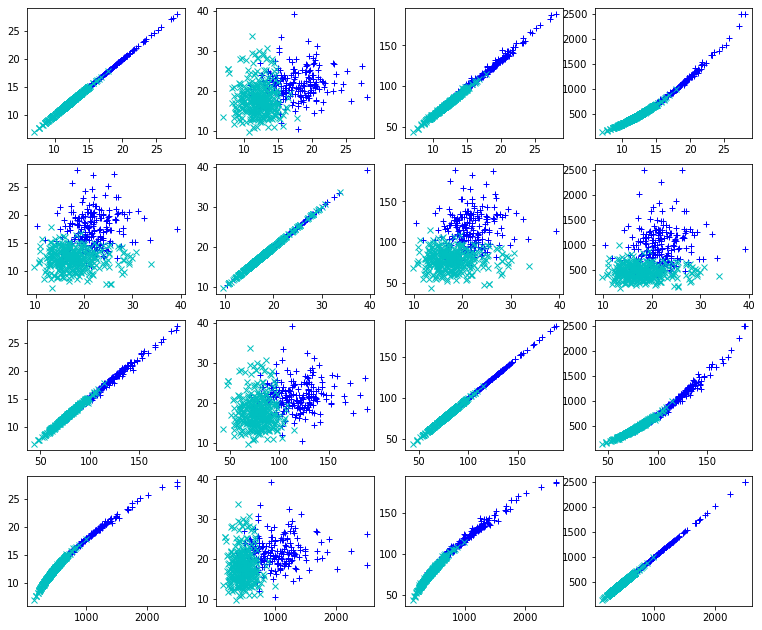

In [2]:
# Load the breast cancer datasets.
data = datasets.load_breast_cancer()
X = data.data
y = data.target

# Get class labels as marker style for the plot
# Note that the y's in this dataset are 0-1 values
idx_0 = np.where(y==0)
idx_1 = np.where(y==1)

# Plot the relations between the first four features to visualize the data
fig, axs = plt.subplots(4, 4, figsize=(13, 11))

for i in range(0,4):
    for j in range(0,4):
        axs[i,j].plot(X[idx_0, i], X[idx_0, j], "b+", label="y = 0")
        axs[i,j].plot(X[idx_1, i], X[idx_1, j], "cx", label="y = 1")
        
plt.show()

## Step-by-Step Calculation of PCA

In [3]:
# Normalize the data
X_normalized = X - np.mean(X, axis=0)

# calculate the A matrix
A = np.dot(X_normalized.T, X_normalized)

# eigenvalue decomposition of A
eigvals, eigvecs = np.linalg.eig(A)

# Sort the eigenvalues and vectors from largest to smallest
idx = eigvals.argsort()[::-1]   
eigvals = eigvals[idx]
eigvecs = eigvecs[:,idx]


 At least 2 PCs are required to capture 99.5% of the total variations of the data. 



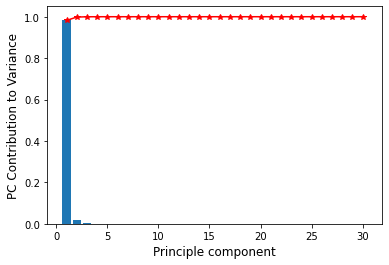

In [4]:
# Contributions of principle components (PCs) to variance 
var_ratio = eigvals/np.sum(eigvals)
contribution = np.cumsum(eigvals) / np.sum(eigvals)  # this is for cumulative contribution

# Given a threshold, determine the number of PCs required to capture the variance.
threshold = 0.995
PC_num = np.where(contribution >= threshold)[0][1]
print("\n At least "+str(PC_num)+" PCs are required to capture "+ str(threshold*100)+"% of the total variations of the data. \n")

# Plot individual ratio (bar) and cumulative contribution (line) of each PC
plt.plot(np.arange(1,len(eigvals)+1), contribution, "r-*")
plt.bar(np.arange(1,len(eigvals)+1), var_ratio,)
plt.ylabel("PC Contribution to Variance", fontsize=12)
plt.xlabel("Principle component", fontsize=12)
plt.show()

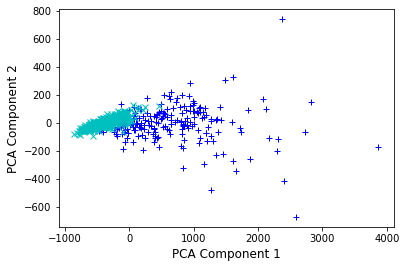

In [5]:
# Keep only the first "PC_num" PCs with largest eigenvectors
eigvals_idx = eigvals[:PC_num]
eigvecs_idx = eigvecs[:, :PC_num]
    
# Transform initial data through projection
X_pca = X_normalized.dot(eigvecs_idx)

# Plot the compressed version
plt.plot(X_pca[idx_0, 0], X_pca[idx_0, 1], "b+", label="y = 0")
plt.plot(X_pca[idx_1, 0], X_pca[idx_1, 1], "cx", label="y = 0")
plt.ylabel("PCA Component 2", fontsize=12)
plt.xlabel("PCA Component 1", fontsize=12)
plt.show()

### PCA Package in Scikit-learn

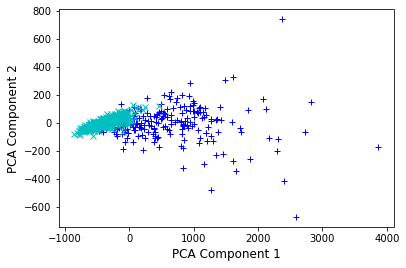

In [6]:
from sklearn.decomposition import PCA

# Use the PCA package directly
skl_pca = PCA(PC_num)
X_skl_pca = skl_pca.fit_transform(X)

# Plot the compressed version..
plt.plot(X_skl_pca[idx_0, 0], X_skl_pca[idx_0, 1], "b+", label="y = 0")
plt.plot(X_skl_pca[idx_1, 0], X_skl_pca[idx_1, 1], "cx", label="y = 0")
plt.ylabel("PCA Component 2", fontsize=12)
plt.xlabel("PCA Component 1", fontsize=12)
plt.show()

## Use Iris Dataset for Kernel PCA and t-SNE

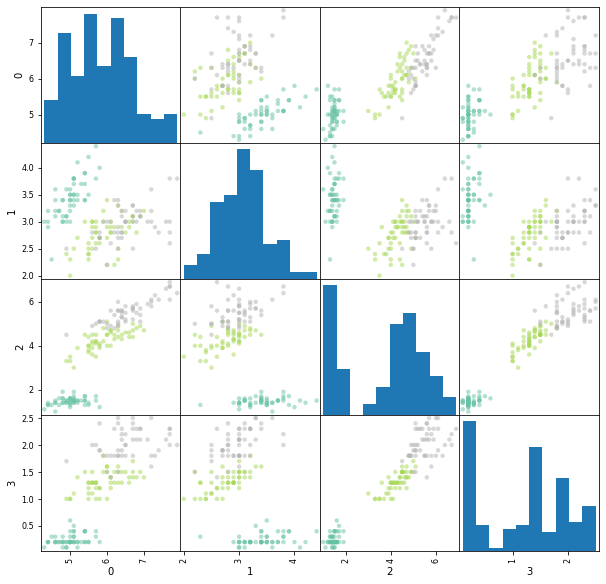

In [7]:
# Loading Iris dataset
data = datasets.load_iris()
X = data['data']
y = data['target']

# use Pandas for data visualization
import pandas as pd
df = pd.DataFrame(X)
_ = pd.plotting.scatter_matrix(df, c = y, cmap='Set2', figsize = [10, 10], s=20, marker = 'o')

In [8]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Polynomial Kernel PCA
kpca_poly = KernelPCA(n_components=2, kernel='poly', degree=2, gamma=1, coef0=0.5)
X_kpca_poly = kpca_poly.fit_transform(X)

# RBF Kernel PCA
kpca_rbf = KernelPCA(n_components=2, kernel='rbf')
X_kpca_rbf = kpca_rbf.fit_transform(X)

# t-SNE
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 150 samples in 0.001s...
[t-SNE] Computed neighbors for 150 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 150 / 150
[t-SNE] Mean sigma: 0.667454
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.044140
[t-SNE] KL divergence after 300 iterations: 0.117237


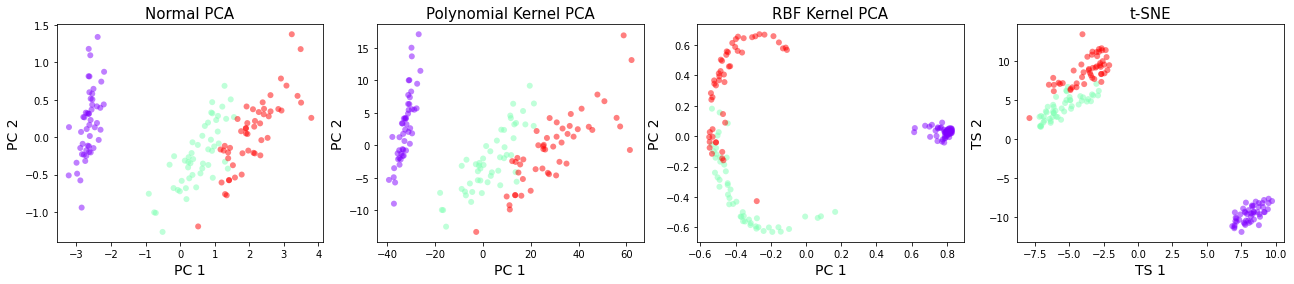

In [9]:
# Plot the results of the four methods for comparison.
plt.figure(figsize=(22,4))

plt.subplot(141)
plt.xlabel('PC 1', fontsize=14)
plt.ylabel('PC 2', fontsize=14)
plt.title("Normal PCA", fontsize=15)
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, cmap='rainbow', alpha=0.5, edgecolors='none')
plt.subplot(142)
plt.xlabel('PC 1', fontsize=14)
plt.ylabel('PC 2', fontsize=14)
plt.title("Polynomial Kernel PCA", fontsize=15)
plt.scatter(X_kpca_poly[:,0], X_kpca_poly[:,1], c=y, cmap='rainbow', alpha=0.5, edgecolors='none')
plt.subplot(143)
plt.xlabel('PC 1', fontsize=14)
plt.ylabel('PC 2', fontsize=14)
plt.title("RBF Kernel PCA", fontsize=15)
plt.scatter(X_kpca_rbf[:,0], X_kpca_rbf[:,1], c=y, cmap='rainbow', alpha=0.5, edgecolors='none')
plt.subplot(144)
plt.xlabel('TS 1', fontsize=14)
plt.ylabel('TS 2', fontsize=14)
plt.title("t-SNE", fontsize=15)
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=y, cmap='rainbow', alpha=0.5, edgecolors='none')

plt.show()